---
title: "Electric data visualization"
author: "Frank Dong, Di Ziyan, Qiu Jingxi"
---

data reference:

https://www.eia.gov/todayinenergy/detail.php?id=61783
Hourly Electric Grid Monitor


# Is EV being the future?

# Explor the elctric generation in one day
2024.4.10 to 4.16

Since Texas is the southest state in the US, with one of the most wind and solar erengy generation. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd


In [181]:
HEGM = pd.read_excel('data/Region_TEX.xlsx', sheet_name="Hourly Charts", header=1)

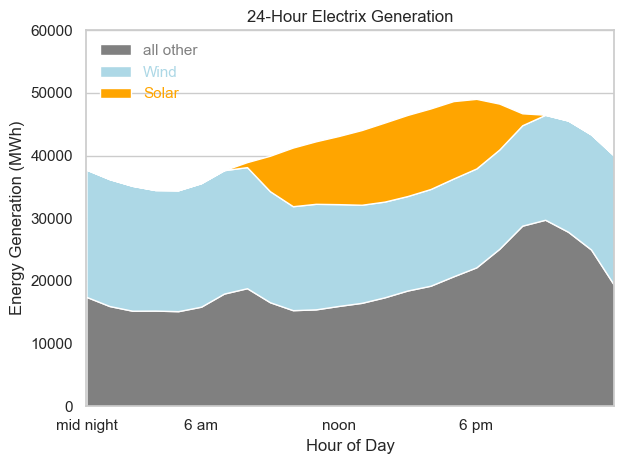

In [182]:
HEGM = HEGM[HEGM["Local time"] > "2024-04-10 00:00:00"]
HEGM = HEGM[HEGM["Local time"] < "2024-04-17 00:00:00"]
Hourly = HEGM[["Hour", "Demand", "Net generation", "Coal", "Natural gas", "Petroleum", "Hydro", "Solar", "Wind", "Other"]]
Hourly.dropna(inplace=True)
data = Hourly.groupby("Hour").mean().round(1)
data.reset_index(inplace=True)
data["all other"] = data["Coal"] + data["Natural gas"] + data["Petroleum"] + data["Other"] + data["Hydro"]
hours = data['Hour']
energy_sources = data[['all other', 'Wind', 'Solar']]
plt.stackplot(hours, energy_sources.T, labels=energy_sources.columns, colors=["gray", "lightblue", "orange"], alpha=1)
plt.title('24-Hour Electrix Generation')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Generation (MWh)')
plt.xlim([1, 24])
plt.xticks([1, 6, 12, 18], ["mid night","6 am", "noon", "6 pm"])
plt.grid(axis="x")
plt.ylim([0, 60000])
plt.tight_layout()
plt.legend(frameon=False, loc='upper left', labelcolor = "linecolor")
plt.show()


Data source: U.S. Energy Information Administration, Hourly Electric Grid Monitor

Note: Other fuels include coal, natural gas, hydropower, and nuclear. Utility-scale solar only. Winter is the full months of December, January, and February. ERCOT=Electric Reliability Council of Texas.

## Since the total need is not change, so we want to check what are we saving when we use solar energy

In [155]:
HEGM = pd.read_excel('data/Region_TEX.xlsx', sheet_name="Hourly Charts", header=1)
HEGM = HEGM[HEGM["Local time"] > "2024-04-7 00:00:00"]
HEGM = HEGM[HEGM["Local time"] < "2024-04-10 00:00:00"]
Hourly = HEGM[["Local time", "Net generation", "Coal", "Natural gas", "Petroleum", "Hydro", "Solar", "Wind", "Other"]]
Hourly.dropna(inplace=True)
data = Hourly
data.reset_index(inplace=True)



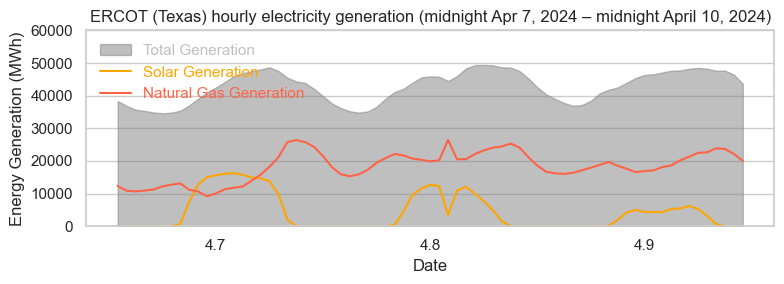

In [179]:
data["all other"] = data["Coal"] + data["Wind"] + data["Petroleum"] + data["Other"] + data["Hydro"]
data["sum"] = data["all other"] + data["Solar"] + data["Natural gas"]
energy_sources = data[['sum', 'Natural gas', 'Solar']]
plt.figure(figsize=(8, 3))


plt.fill_between(data["Local time"], 0, data["sum"], color="gray", label="Total Generation", alpha=0.5)
plt.plot(data["Local time"], data["Solar"], color="orange", label="Solar Generation")
plt.plot(data["Local time"], data["Natural gas"], color="tomato", label="Natural Gas Generation")
plt.title('ERCOT (Texas) hourly electricity generation (midnight Apr 7, 2024 – midnight April 10, 2024)')
plt.ylabel('Energy Generation (MWh)')
plt.ylim([0, 60000])
plt.grid(axis="x")
plt.xticks([pd.Timestamp('2024-04-07 12:00:00'), pd.Timestamp('2024-04-08 12:00:00'), pd.Timestamp('2024-04-09 12:00:00')], ["4.7", "4.8", "4.9"])
# plt.xlim("2024-04-7 00:00:00", "2024-04-10 00:00:00")
plt.xlabel('Date')
plt.tight_layout()
plt.legend(frameon=False, loc='upper left', labelcolor = "linecolor")
plt.show()

Data source: U.S. Energy Information Administration, Hourly Electric Grid Monitor

Note: X-axis shows central time. ERCOT=Electric Reliability Council of Texas

## Natural gas filled in most of the drop in solar generation in Texas during April 8 eclipse

On April 8, 2024, a total solar eclipse caused a significant, albeit brief, reduction in sunlight reaching utility-scale solar electric generation plants across its path from Texas to Maine. The impact was particularly pronounced in Texas due to the high amount of solar capacity located within the path of totality.

The Electric Reliability Council of Texas (ERCOT), the key balancing authority for the state, experienced a loss of around 8.9 gigawatts (GW) of solar capacity during the eclipse according to our Hourly Electric Grid Monitor. The decline in solar generation began at 12:20 p.m. central time (CT), with the eclipse concluding in Texas at 3:07 p.m. CT.

In response, the majority of the shortfall in solar generation within ERCOT was compensated for by natural gas-fired generation, which accounted for roughly 80% of the replacement generation on April 8. The EIA’s Hourly Electric Grid Monitor, capturing grid activity over wider time intervals than the ERCOT-specific data, indicated that natural gas power plants ramped up production by an extra 6.2 GW between 1 p.m. CT and 2 p.m. CT, the peak period of the eclipse, to make up for the deficit in solar power. Coal and other sources, predominantly battery storage, contributed an additional 0.8 GW each to help mitigate the impact.

Typically, solar power is the second-largest source of energy in ERCOT during the afternoon hours, following natural gas. On the day of the eclipse, solar generation in Texas was notably lower than the previous day, April 7, and this reduction persisted into April 9 due to continued cloudy weather.

referrence: https://www.eia.gov/todayinenergy/detail.php?id=61824

# Electric Generation yearly trend

In [69]:
raw = pd.read_excel('data/Region_TEX.xlsx', sheet_name="Daily Charts", header=1)

In [102]:
raw = raw[raw["Local date"] > "2023-05-1"]
raw = raw[raw["Local date"] < "2024-04-1"]

In [103]:
daily = raw[["Local date", "Demand", "Net generation", "Coal", "Natural gas", "Petroleum", "Hydro", "Solar", "Wind", "Other"]].dropna()


In [104]:
daily.to_csv('data/daily.csv', index=False)

In [105]:
daily["all other"] = daily["Coal"] + daily["Natural gas"] + daily["Petroleum"] + daily["Other"] + daily["Hydro"]

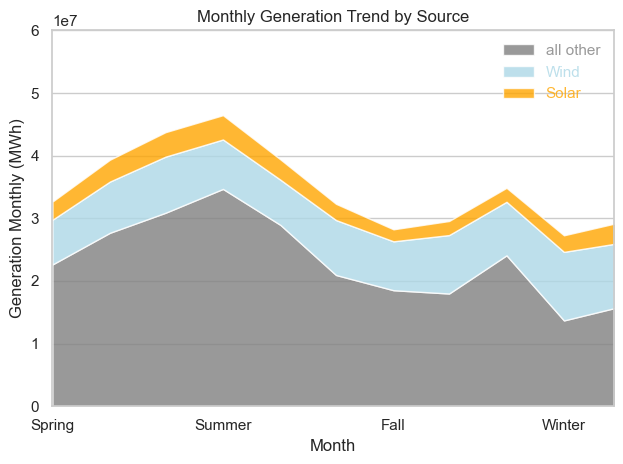

In [124]:
data = daily.copy()
data['Local date'] = pd.to_datetime(data['Local date'])
generation_types_columns = ['all other', 'Wind', 'Solar']
data['YearMonth'] = data['Local date'].dt.to_period('M')
data = data.set_index('Local date')
monthly_data = data.groupby('YearMonth').sum()
monthly_generation_data = monthly_data[generation_types_columns]
monthly_generation_data.index = monthly_generation_data.index.to_timestamp()

# plt.figure(figsize=(14, 8))
plt.stackplot(monthly_generation_data.index, monthly_generation_data.T, labels=generation_types_columns, colors=["gray", "lightblue", "orange"], alpha=0.8)
# plt.legend(loc='upper left')
plt.xlim([pd.Timestamp('2023-05-01'), pd.Timestamp('2024-02-28')])
plt.title('Monthly Generation Trend by Source')
plt.xlabel('Month')
plt.ylabel('Generation Monthly (MWh)')
plt.grid(axis="x")
plt.ylim([0, 60000000])
plt.xticks(['2023-05','2023-08', '2023-11', '2024-02'], ["Spring", "Summer", "Fall", "Winter"])
plt.legend(frameon=False, loc='upper right', labelcolor = "linecolor", )
plt.tight_layout()
plt.show()


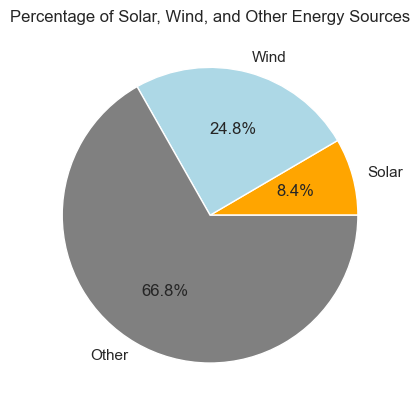

In [123]:
total_generation = data[generation_types_columns].sum()

# Sum the 'Other' category as the sum of all except Solar and Wind
total_generation['Other'] = total_generation.sum() - total_generation['Solar'] - total_generation['Wind']

# Keep only Solar, Wind, and the recalculated 'Other'
pie_chart_data = total_generation[['Solar', 'Wind', 'Other']]
plt.pie(pie_chart_data, labels=pie_chart_data.index, autopct='%1.1f%%', startangle=0, colors=['orange', 'lightblue', 'gray'])
plt.title('Percentage of Solar, Wind, and Other Energy Sources')
plt.show()


# EV sales and charging station

https://www.eia.gov/totalenergy/data/browser/index.php?tbl=TF1#/?f=A&start=2015

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [92]:
top_5_states[['State', 'port']]

,State,port
5,CA,51049.0
18,NY,11726.0
38,FL,10197.0
4,TX,9244.0
37,MA,7709.0


In [93]:
df = pd.read_csv("data/alt_fuel_stations (Apr 21 2024) (1).csv")
df = df[["State", 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',]]
df.fillna(0, inplace=True)
df["port"] = df["EV DC Fast Count"] + df["EV Level1 EVSE Num"] + df["EV Level2 EVSE Num"]
geo = df.groupby("State")["port"].sum()
usa = gpd.read_file("./data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")

geo = pd.DataFrame(geo).reset_index()
geo.head(1)
import plotly.graph_objects as go
plotly_map = usa.merge(geo, left_on='STUSPS', right_on='State')

top_5_states = plotly_map.nlargest(5, 'port')
# fig_map1 = go.Figure(go.Choropleth(
#     locations=plotly_map['State'], 
#     z=plotly_map["port"], 
#     locationmode='USA-states', 
#     colorscale='Reds',
# ))

# # fig_map1.update_layout(title_text='EV charging stations by State', geo_scope='usa', )
# fig_map1.update_layout(
#     legend_title="Top 5 States",
#     legend=dict(
#         x=0,
#         y=1,
#         traceorder="reversed",
#         title_font_family="Arial",
#         font=dict(
#             family="Arial",
#             size=12,
#             color="black"
#         ),
#         bgcolor="LightSteelBlue",
#         bordercolor="Black",
#         borderwidth=2
#     ),
#     geo_scope='usa',
# )

# fig_map1.show()

In [95]:
# Define your figure
fig_map1 = go.Figure(go.Choropleth(
    locations=plotly_map['State'],
    z=plotly_map["port"],
    locationmode='USA-states',
    colorscale='Reds',
    # name="Your Custom Name"
))

# Update layout
fig_map1.update_layout(
    title_text='EV charging stations by State',
    geo_scope='usa',
    legend_title="Number of Ports",
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",  # Change this to "normal" to fix the order
        title_font_family="Arial",
        font=dict(
            family="Arial",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

# Show the figure
fig_map1.show()
